## Final Project: Data Preparation for ML Model

##### Importing the libraries necessary for this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")

##### Load the **Bank Customer Analytics** dataset.

In [2]:
df = pd.read_csv("datasets/bank_customer_analytics.csv")

##### Creating a separate copy of the original dataframe.

In [3]:
cached_df = df.copy()

### 1. Exploratory Data Analysis (EDA):
##### Print the **first 5 rows** of the dataset to get the overview of dataframe.

In [4]:
df.head(5)

,CustomerID,Age,Gender,MaritalStatus,Income,Savings,CreditScore,LoanAmount,LoanStatus,AccountType,YearsWithBank,Churn
0,C0001,25.0,FEMALE,single,80000.0,15000.0,600.0,50000.0,approved,joint,NaN,no
1,C0002,35.0,male,single,40000.0,5000.0,700.0,40000.0,approved,joint,10.0,no
2,C0003,35.0,female,single,100000.0,20000.0,800.0,50000.0,defaulted,checking,10.0,no
3,C0004,45.0,male,married,80000.0,20000.0,750.0,30000.0,approved,checking,NaN,no
4,C0005,45.0,male,married,40000.0,25000.0,750.0,20000.0,rejected,checking,2.0,yes


##### Get a tuple representing the dimensionality of the dataframe.

In [5]:
df.shape

(3000, 12)

##### Get the data type of each column in the dataframe.

In [6]:
df.dtypes

CustomerID        object
Age              float64
Gender            object
MaritalStatus     object
Income           float64
Savings          float64
CreditScore      float64
LoanAmount       float64
LoanStatus        object
AccountType       object
YearsWithBank    float64
Churn             object
dtype: object

##### The dataset contains 6 numerical (float64) and 6 categorical(object) columns.

##### Checks the sum of **missing values** for each column

In [7]:
df.isna().sum()

CustomerID         0
Age              162
Gender             0
MaritalStatus      0
Income           135
Savings          146
CreditScore      143
LoanAmount       133
LoanStatus         0
AccountType        0
YearsWithBank    287
Churn              0
dtype: int64

##### Checks the number of **unique values** for each column

In [8]:
df.nunique()

CustomerID       3000
Age                 4
Gender              4
MaritalStatus       4
Income              4
Savings             8
CreditScore         5
LoanAmount          4
LoanStatus          3
AccountType         4
YearsWithBank       6
Churn               2
dtype: int64

##### Get **statistically description** of the numerical data in the dataframe

In [9]:
df.describe()

,Age,Income,Savings,CreditScore,LoanAmount,YearsWithBank
count,2838.000000,2865.000000,2854.000000,2857.000000,2867.000000,2713.000000
mean,39.048626,68293.193717,21483.882270,694.662233,34080.920823,6.883155
std,9.816456,19997.850070,20893.054327,68.907793,9972.978607,5.907284
min,25.000000,40000.000000,5000.000000,600.000000,20000.000000,1.000000
25%,35.000000,60000.000000,10000.000000,650.000000,30000.000000,2.000000
50%,35.000000,60000.000000,15000.000000,700.000000,30000.000000,5.000000
75%,45.000000,80000.000000,20000.000000,750.000000,40000.000000,10.000000
max,55.000000,100000.000000,200000.000000,800.000000,50000.000000,100.000000


##### We use the **value_counts()** method to see the target feature (Gender) distribution.

In [10]:
df["Gender"].value_counts()

Gender
female    889
male      871
FEMALE    632
Male      608
Name: count, dtype: int64

##### Converting all values to lowercase (or uppercase) ensures consistency, making it easier to compare values, group data, or perform aggregations. It can help avoid issues where a value might appear multiple times but in different cases, leading to unnecessary duplication or errors in analysis.

In [11]:
df['Gender'] = df['Gender'].apply(lambda x:x.lower())
df["Gender"].value_counts()

Gender
female    1521
male      1479
Name: count, dtype: int64

##### Analyze the distribution of marital status by gender

Text(0, 0.5, 'Customers')

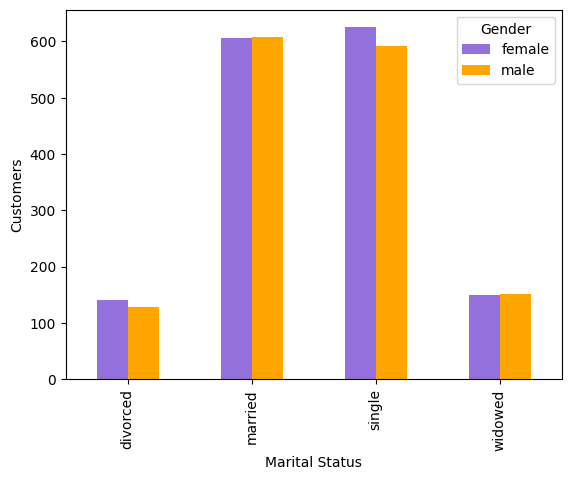

In [12]:
df.groupby(["MaritalStatus", 'Gender']).size().unstack(level=1).plot(kind='bar',color=['mediumpurple', 'orange'])
plt.xlabel("Marital Status")
plt.ylabel("Customers")

##### Plotting a scatterplot between different individuals' incomes and savings. It shows how savings fluctuates according to the corresponding incomes.

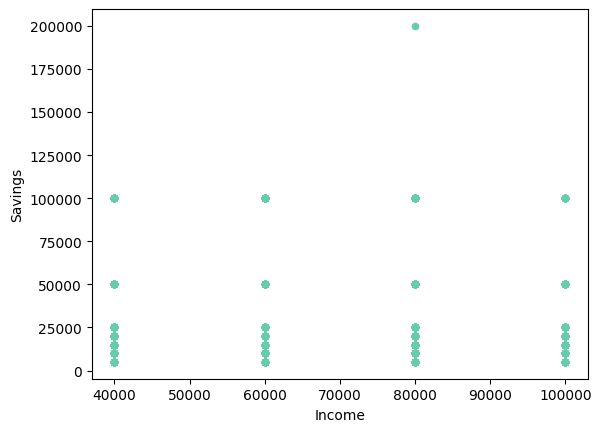

In [13]:
df.plot.scatter(x="Income",y="Savings", color='mediumaquamarine')
plt.show()

##### According to the scatterplot and statistically description, we can see that the most savings fall within a range of 5000 and 100000.

In [14]:
df = df[df['Savings'] <= 100000]

##### Plotting the same graph and we can see that there is no outlier present.

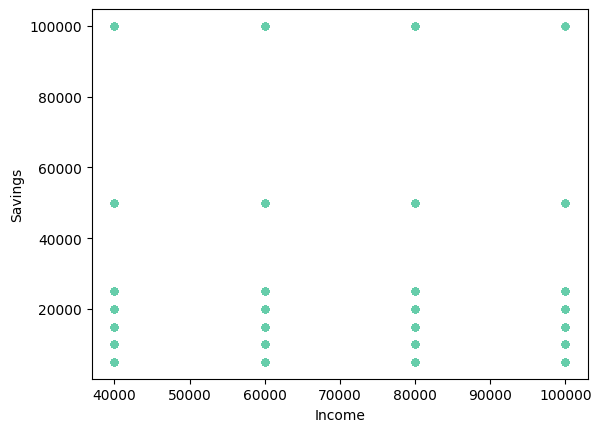

In [15]:
df.plot.scatter(x="Income",y="Savings", color='mediumaquamarine')
plt.show()

##### Plotting side by side box plots of credit score by account type to understand how can different types of account affect the credit score.

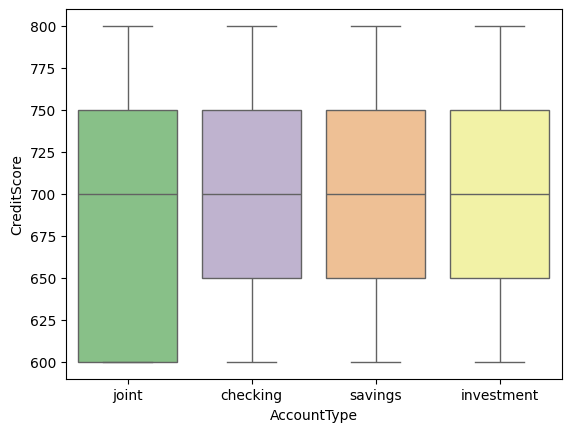

In [16]:
sns.boxplot(x='AccountType', y='CreditScore', hue='AccountType', data=df, palette='Accent', legend=False)
plt.show()

##### Plotting a lineplot that shows the relationship between Age and Income.

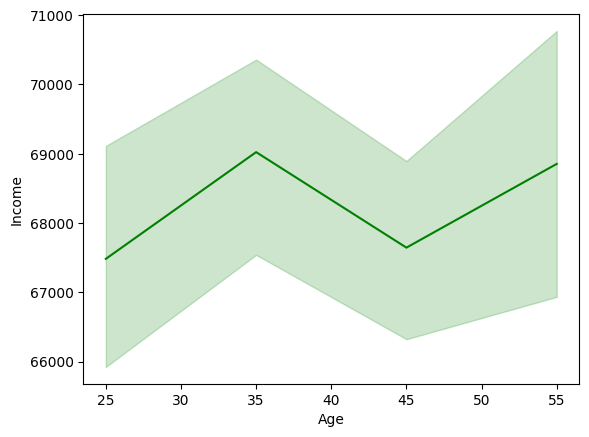

In [17]:
sns.lineplot(x='Age', y='Income', data=df,  color='green')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

##### Plotting Savings of customers and Year with bank, it can be assumed that savings increases with the Years with bank.

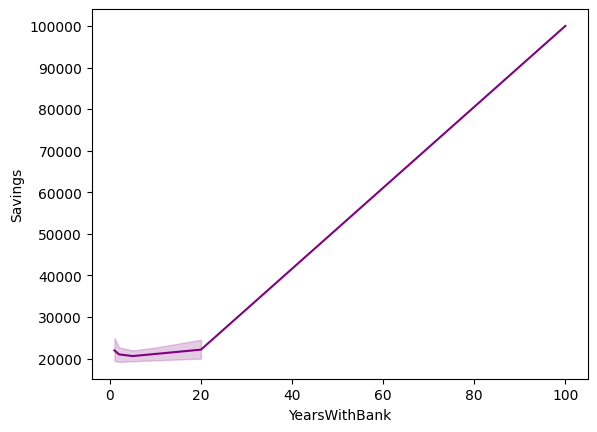

In [18]:
sns.lineplot(x='YearsWithBank', y='Savings', data=df,  color='purple')
plt.xlabel('YearsWithBank')
plt.ylabel('Savings')
plt.show()

##### Analyze categorical column Churn

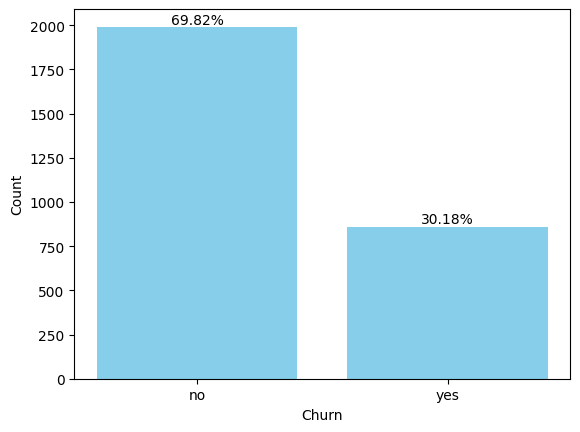

In [19]:
counts = df['Churn'].value_counts()
bars = plt.bar(counts.index, counts, color='skyblue')
for bar in bars:
    height = bar.get_height()/len(df)*100
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),f'{height:.2f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

##### Creating new column Churn_rate of numerical data type where if Churn is "yes" then 1 else if "no" then 0. 

In [20]:
df['Churn_rate'] = np.where(df['Churn']=='yes',1.0,0.0)

##### The figure below shows the mean number of customers who left the bank and the loan status.

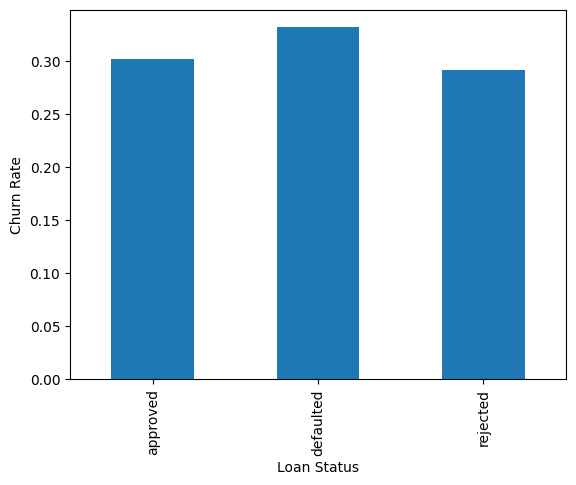

In [21]:
df.groupby('LoanStatus')['Churn_rate'].mean().plot.bar()
plt.xlabel("Loan Status")
plt.ylabel("Churn Rate")
plt.show()

##### Also, plotting the account type with the churn rate. We can conclude that customers who have savings type of account are likelier to left the bank.

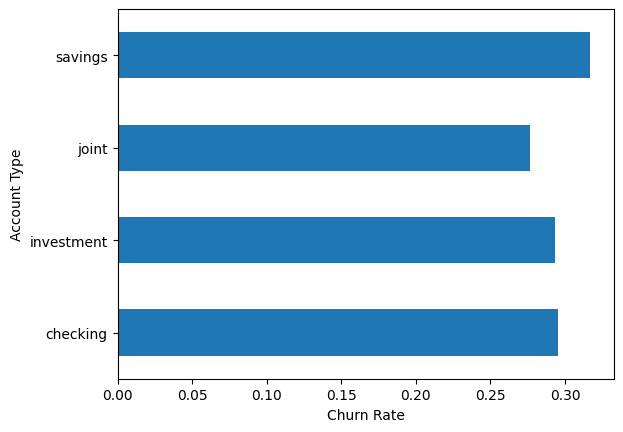

In [22]:
df.groupby('AccountType')['Churn_rate'].mean().plot.barh()
plt.xlabel("Churn Rate")
plt.ylabel("Account Type")
plt.show()

### 2. Handle Missing Data:

##### For handling missing data in column Age, we can replace null values in column Age with the mean of values in the same column.

In [23]:
mean_age = df['Age'].mean()
age_data = df['Age'].fillna(value=mean_age)

##### Replacing missing values with the mean seems that it is not good for preserving the distribution.

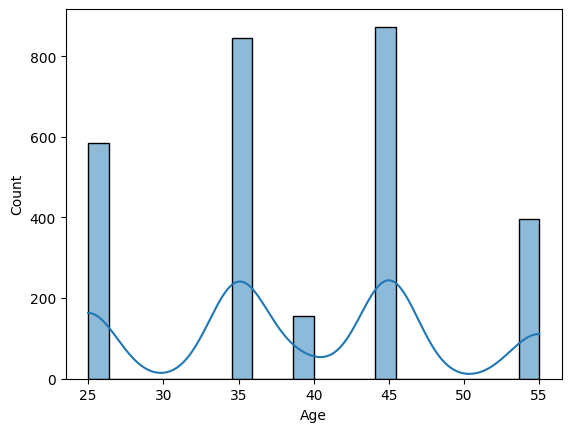

In [24]:
sns.histplot(age_data, kde=True)
plt.show()

##### Preserving the distribution is important for our analysis, so filling the missing values in the Age column with the previous value gives us better results.

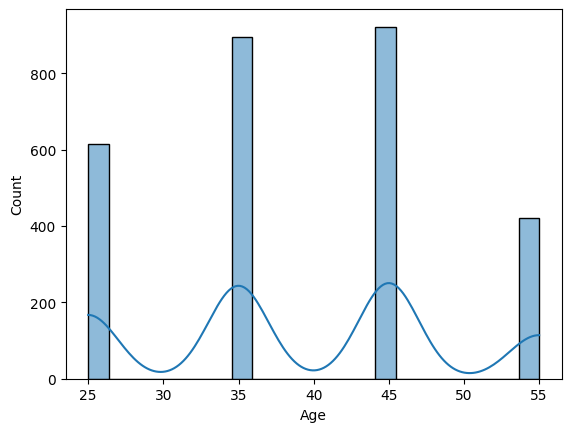

In [25]:
df['Age'] = df['Age'].fillna(method='ffill')
sns.histplot(df['Age'], kde=True)
plt.show()

##### For handling missing data in column Income that is not normally distributed, the median is the better choice. 

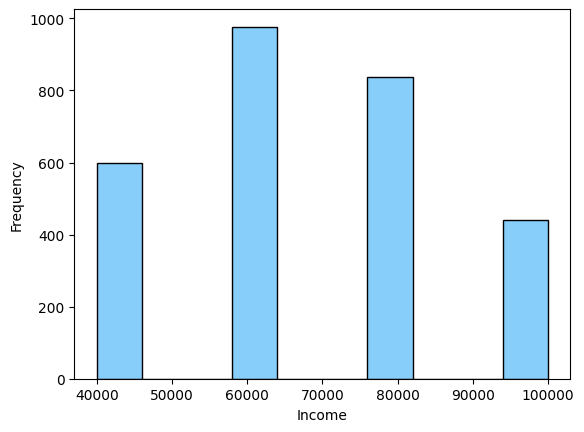

In [26]:
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(value=median_income)
df['Income'].plot(kind='hist', color='lightskyblue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

##### The number of missing values in the credit score column is relatively small compared to the dataset, so we can remove the rows with missing values. 

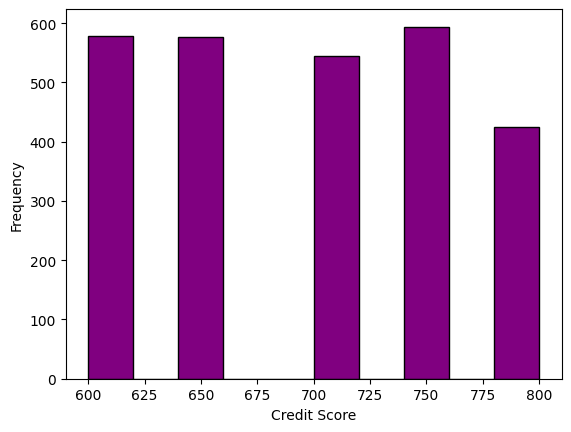

In [27]:
df.dropna(subset=['CreditScore'], inplace=True)
plt.hist(df['CreditScore'], bins=10, color='purple', edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

##### Replacing missing values with the mean in the Loan Amount column it is not good method for maintaining the integrity of relationships between variables. Due to the limited number of missing values in the Loan Amount column we can drop rows with NaN. 

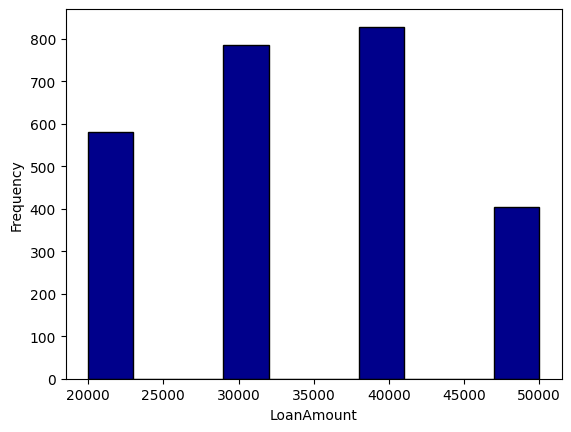

In [28]:
df.dropna(subset=['LoanAmount'], inplace=True)
df['LoanAmount'].plot(kind='hist', color='darkblue', edgecolor='black')
plt.xlabel("LoanAmount")
plt.ylabel("Frequency")
plt.show()

##### Since the number of years with a bank account has a negative binomial distribution, the median is the best choice for handling missing values in Years with bank column.

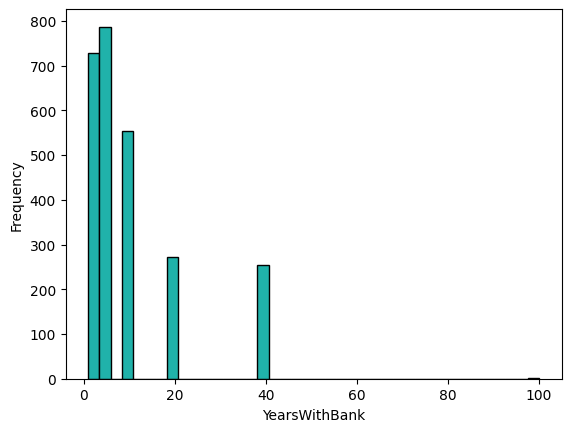

In [29]:
median_age = df['YearsWithBank'].median()
df['YearsWithBank'] = df['YearsWithBank'].fillna(value=mean_age)
df['YearsWithBank'].plot(kind='hist', bins=40, color='lightseagreen', edgecolor='black')
plt.xlabel("YearsWithBank")
plt.ylabel("Frequency")
plt.show()

### 3. Feature Selection:

##### Select only the numeric columns in the dataframe

In [30]:
df_numeric = df.select_dtypes(include=np.number)

##### Computing the correlation matrix of the numeric columns 

In [31]:
corr_matrix = df_numeric.corr()

##### Define the colormap which maps the data values to the color space defined with the diverging_palette method

In [32]:
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

##### Creating heatmap on correlation matrixn, set colormap to cmap

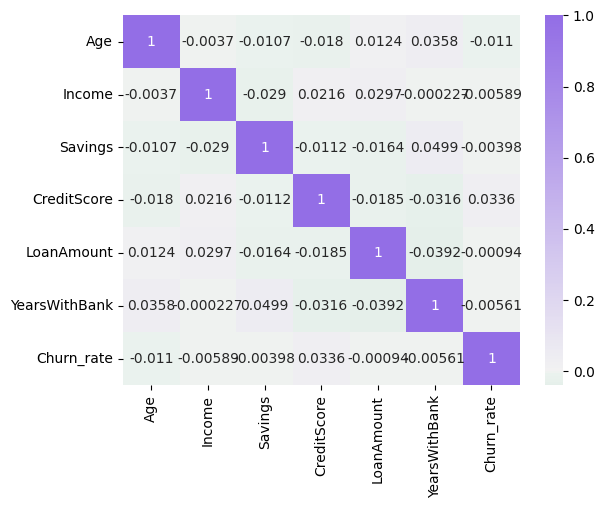

In [33]:
sns.heatmap(corr_matrix, annot=True, center=0, cmap=colors, robust=True, fmt='.3g')
plt.show()

##### Using variance thresholding, the selected_features dataset have only the features with variance above the threshold. All of the columns will be retained due to its higher variance.

In [34]:
threshold = 0.1
selector = VarianceThreshold(threshold)
selected_features = selector.fit_transform(df_numeric)
print("Features selected by variance:", selector.get_support(indices=True))

Features selected by variance: [0 1 2 3 4 5 6]


##### Using Information Gain in order to measures the reduction in uncertainty of the target variable churn_rate.

In [35]:
selected_col = df_numeric.loc[:, df_numeric.columns != 'Churn_rate']
info_gain = mutual_info_classif(selected_col, df['Churn_rate'])
column_names = selected_col.columns
for index, gain in enumerate(info_gain):
    print(f"Information gain for feature {column_names[index]} is: {gain:.3f}")

Information gain for feature Age is: 0.000
Information gain for feature Income is: 0.001
Information gain for feature Savings is: 0.000
Information gain for feature CreditScore is: 0.000
Information gain for feature LoanAmount is: 0.006
Information gain for feature YearsWithBank is: 0.009


##### Using Random Forests to rank features based on their importance.

In [36]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(selected_col, df['Churn_rate'])
feature_importances = rf.feature_importances_
feature_names = selected_col.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

         Feature  Importance
2        Savings    0.204644
5  YearsWithBank    0.172354
4     LoanAmount    0.160420
0            Age    0.159099
1         Income    0.151858
3    CreditScore    0.151625


##### The features are sorted by their importance scores and a horizontal bar plot is created to visualize the importance of each feature.

Text(0.5, 1.0, 'Feature Importances')

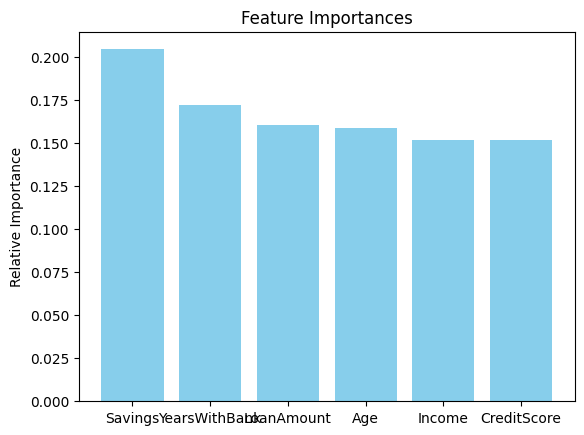

In [37]:
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue', align='center')
plt.ylabel('Relative Importance')
plt.title('Feature Importances')

##### Drop the customer ID as it is of no use.

In [38]:
df.drop('CustomerID', axis=1, inplace=True)

##### Drop the Churn because it replaced by numerical column Churn_rate

In [39]:
df.drop('Churn', axis=1, inplace=True)

##### We can extract feature selection informations in order to remove features from the dataset to improve the efficiency and accuracy of your machine learning model. We will drop the Age and CreditScore columns because of the high correlation with the YearWithBank column.

In [40]:
df = df.drop(columns=['Age','CreditScore'])

### 4. Prepare Final Dataset:
##### Saving the clean, processed dataset with selected features to CSV file.

In [41]:
df.to_csv('datasets/bank_customer_dataset.csv')